# **Loading Modules and Datasets**

In [ ]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from sklearn import preprocessing

from imblearn.under_sampling import RandomUnderSampler

from sklearn.ensemble import RandomForestClassifier  

from imblearn.over_sampling import RandomOverSampler

from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/train_LZdllcl.csv')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Project/test_2umaH9m.csv')

## **EDA**

In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

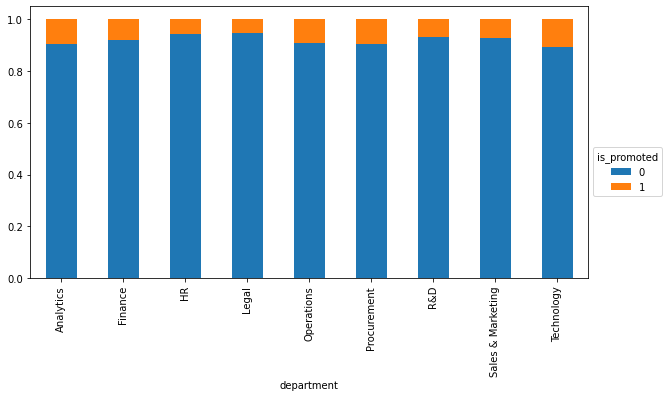

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
ct = pd.crosstab(df.department,df.is_promoted,normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

**While Technology department had highest percentage of employees getting promoted, Legal department has the least number. But we don't see major differences in terms of percentages.**

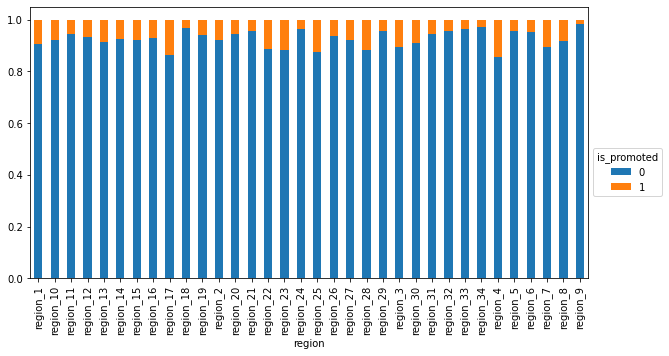

In [ ]:
reg = pd.crosstab(df.region,df.is_promoted,normalize='index')
reg.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

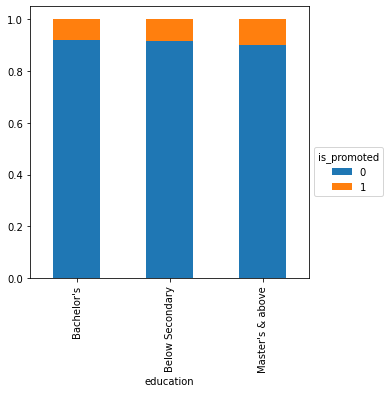

In [ ]:
plt.rcParams['figure.figsize'] = [5, 5]
edu = pd.crosstab(df.education,df.is_promoted,normalize='index')
edu.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = [5, 5]
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

**As we can see the percentages are pretty much the same aross different educational backgrounds.**

In [ ]:
pd.crosstab(df.gender,df.is_promoted,normalize='index')

is_promoted,0,1
gender,,
f,0.910066,0.089934
m,0.916849,0.083151


In [ ]:
pd.crosstab(df.recruitment_channel,df.is_promoted,normalize='index')

is_promoted,0,1
recruitment_channel,,
other,0.916048,0.083952
referred,0.879159,0.120841
sourcing,0.914987,0.085013


**According to the data, percentage of promotions is higher among the employees who got recruited through referrals.**

In [ ]:
pd.crosstab(df['KPIs_met >80%'],df.is_promoted,normalize='index')

is_promoted,0,1
KPIs_met >80%,,
0,0.960413,0.039587
1,0.830906,0.169094


**According to the data, percentage of promotions is higher of the employees having KPIs greater than 80%.**

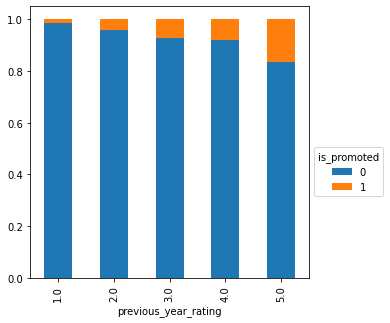

In [ ]:
rating = pd.crosstab(df.previous_year_rating,df.is_promoted,normalize='index')
rating.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

**The ratio of promoted employees increases with previous year rating which is quite obvious.**

In [ ]:
df.corr(method="pearson")

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


## **Feature** **Engineering**

Playing dummies with multiple columns 

First department ->

In [ ]:
df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [ ]:
dummies = pd.get_dummies(df.department)

In [ ]:
dummies

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
54803,0,0,0,0,0,0,0,0,1
54804,0,0,0,0,1,0,0,0,0
54805,1,0,0,0,0,0,0,0,0
54806,0,0,0,0,0,0,0,1,0


In [ ]:
df = pd.concat([df,dummies],axis = 'columns')

In [ ]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,is_promoted,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,0,0,0,0,0,0,0,0,1,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,0,0,0,0,0,1,0,0,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,0,0,0,0,0,0,0,0,1,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,0,0,0,0,0,0,0,0,1,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,...,0,0,0,0,0,0,0,0,0,1
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,...,0,0,0,0,0,1,0,0,0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,...,0,1,0,0,0,0,0,0,0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df = df.drop(['department','R&D'], axis='columns')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
 13  Analytics             54808 non-null  uint8  
 14  Finance               54808 non-null  uint8  
 15  HR                 

Now gender ->

In [ ]:
dummies = pd.get_dummies(df.gender)

In [ ]:
dummies

,f,m
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
54803,0,1
54804,1,0
54805,0,1
54806,0,1


In [ ]:
df = pd.concat([df,dummies],axis = 'columns')

In [ ]:
df = df.drop(['gender', 'f'], axis='columns')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   recruitment_channel   54808 non-null  object 
 4   no_of_trainings       54808 non-null  int64  
 5   age                   54808 non-null  int64  
 6   previous_year_rating  50684 non-null  float64
 7   length_of_service     54808 non-null  int64  
 8   KPIs_met >80%         54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
 12  Analytics             54808 non-null  uint8  
 13  Finance               54808 non-null  uint8  
 14  HR                    54808 non-null  uint8  
 15  Legal              

**Now Education ->**

In [ ]:
dummies = pd.get_dummies(df.education)

In [ ]:
dummies

,Bachelor's,Below Secondary,Master's & above
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
54803,1,0,0
54804,0,0,1
54805,1,0,0
54806,0,0,0


In [ ]:
df = pd.concat([df,dummies],axis = 'columns')

In [ ]:
df = df.drop(['education', 'Below Secondary'], axis='columns')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   region                54808 non-null  object 
 2   recruitment_channel   54808 non-null  object 
 3   no_of_trainings       54808 non-null  int64  
 4   age                   54808 non-null  int64  
 5   previous_year_rating  50684 non-null  float64
 6   length_of_service     54808 non-null  int64  
 7   KPIs_met >80%         54808 non-null  int64  
 8   awards_won?           54808 non-null  int64  
 9   avg_training_score    54808 non-null  int64  
 10  is_promoted           54808 non-null  int64  
 11  Analytics             54808 non-null  uint8  
 12  Finance               54808 non-null  uint8  
 13  HR                    54808 non-null  uint8  
 14  Legal                 54808 non-null  uint8  
 15  Operations         

**Now recruitment channel ->**

In [ ]:
dummies = pd.get_dummies(df.recruitment_channel)

In [ ]:
dummies

,other,referred,sourcing
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
54803,0,0,1
54804,1,0,0
54805,1,0,0
54806,0,0,1


In [ ]:
df = pd.concat([df,dummies],axis = 'columns')

In [ ]:
df = df.drop(['recruitment_channel'], axis='columns')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   region                54808 non-null  object 
 2   no_of_trainings       54808 non-null  int64  
 3   age                   54808 non-null  int64  
 4   previous_year_rating  50684 non-null  float64
 5   length_of_service     54808 non-null  int64  
 6   KPIs_met >80%         54808 non-null  int64  
 7   awards_won?           54808 non-null  int64  
 8   avg_training_score    54808 non-null  int64  
 9   is_promoted           54808 non-null  int64  
 10  Analytics             54808 non-null  uint8  
 11  Finance               54808 non-null  uint8  
 12  HR                    54808 non-null  uint8  
 13  Legal                 54808 non-null  uint8  
 14  Operations            54808 non-null  uint8  
 15  Procurement        

In [ ]:
df

,employee_id,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,Operations,Procurement,Sales & Marketing,Technology,m,Bachelor's,Master's & above,other,referred,sourcing
0,65438,region_7,1,35,5.0,8,1,0,49,0,...,0,0,1,0,0,0,1,0,0,1
1,65141,region_22,1,30,5.0,4,0,0,60,0,...,1,0,0,0,1,1,0,1,0,0
2,7513,region_19,1,34,3.0,7,0,0,50,0,...,0,0,1,0,1,1,0,0,0,1
3,2542,region_23,2,39,1.0,10,0,0,50,0,...,0,0,1,0,1,1,0,1,0,0
4,48945,region_26,1,45,3.0,2,0,0,73,0,...,0,0,0,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,region_14,1,48,3.0,17,0,0,78,0,...,0,0,0,1,1,1,0,0,0,1
54804,74592,region_27,1,37,2.0,6,0,0,56,0,...,1,0,0,0,0,0,1,1,0,0
54805,13918,region_1,1,27,5.0,3,1,0,79,0,...,0,0,0,0,1,1,0,1,0,0
54806,13614,region_9,1,29,1.0,2,0,0,45,0,...,0,0,1,0,1,0,0,0,0,1


**Analysing region again for decision making ->**

In [ ]:
df.region.unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

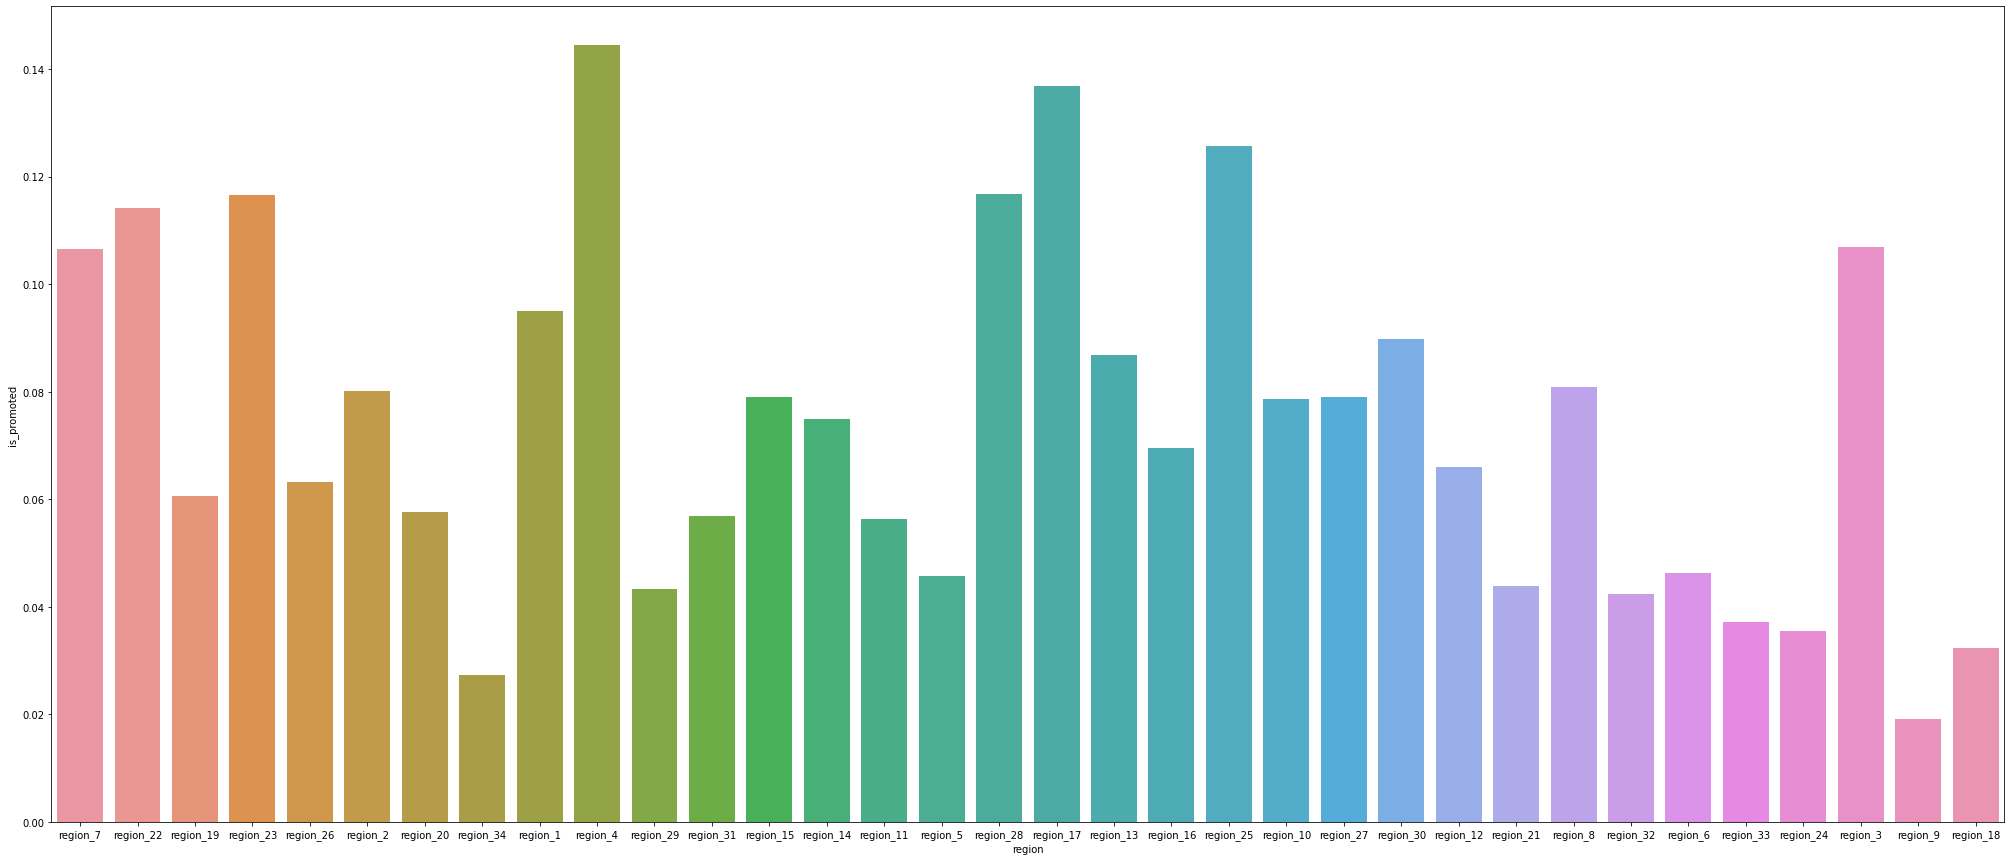

In [ ]:
fig, ax = plt.subplots(figsize=(35, 15))

br = sns.barplot(x='region', y='is_promoted', data=df, ci=None)

plt.show()

In [ ]:
df = df.drop(['region'],axis='columns')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   no_of_trainings       54808 non-null  int64  
 2   age                   54808 non-null  int64  
 3   previous_year_rating  50684 non-null  float64
 4   length_of_service     54808 non-null  int64  
 5   KPIs_met >80%         54808 non-null  int64  
 6   awards_won?           54808 non-null  int64  
 7   avg_training_score    54808 non-null  int64  
 8   is_promoted           54808 non-null  int64  
 9   Analytics             54808 non-null  uint8  
 10  Finance               54808 non-null  uint8  
 11  HR                    54808 non-null  uint8  
 12  Legal                 54808 non-null  uint8  
 13  Operations            54808 non-null  uint8  
 14  Procurement           54808 non-null  uint8  
 15  Sales & Marketing  

In [ ]:
# dummies = pd.get_dummies(df.region)

In [ ]:
# dummies

In [ ]:
# df = pd.concat([df,dummies],axis = 'columns')

In [ ]:
# df = df.drop(['region', 'region_1'], axis='columns')

In [ ]:
df = df.drop(['employee_id'],axis='columns')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   no_of_trainings       54808 non-null  int64  
 1   age                   54808 non-null  int64  
 2   previous_year_rating  50684 non-null  float64
 3   length_of_service     54808 non-null  int64  
 4   KPIs_met >80%         54808 non-null  int64  
 5   awards_won?           54808 non-null  int64  
 6   avg_training_score    54808 non-null  int64  
 7   is_promoted           54808 non-null  int64  
 8   Analytics             54808 non-null  uint8  
 9   Finance               54808 non-null  uint8  
 10  HR                    54808 non-null  uint8  
 11  Legal                 54808 non-null  uint8  
 12  Operations            54808 non-null  uint8  
 13  Procurement           54808 non-null  uint8  
 14  Sales & Marketing     54808 non-null  uint8  
 15  Technology         

In [ ]:
# df = df.drop(['age'],axis='columns')

## **Data Preprocessing**

In [ ]:
 df.isnull().sum()

no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
Analytics                  0
Finance                    0
HR                         0
Legal                      0
Operations                 0
Procurement                0
Sales & Marketing          0
Technology                 0
m                          0
Bachelor's                 0
Master's & above           0
other                      0
referred                   0
sourcing                   0
dtype: int64

In [ ]:
mean_value = df['previous_year_rating'].mean()
df['previous_year_rating'].fillna(value=mean_value, inplace=True)

In [ ]:
 df.isnull().sum()

no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
Analytics               0
Finance                 0
HR                      0
Legal                   0
Operations              0
Procurement             0
Sales & Marketing       0
Technology              0
m                       0
Bachelor's              0
Master's & above        0
other                   0
referred                0
sourcing                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   no_of_trainings       54808 non-null  int64  
 1   age                   54808 non-null  int64  
 2   previous_year_rating  54808 non-null  float64
 3   length_of_service     54808 non-null  int64  
 4   KPIs_met >80%         54808 non-null  int64  
 5   awards_won?           54808 non-null  int64  
 6   avg_training_score    54808 non-null  int64  
 7   is_promoted           54808 non-null  int64  
 8   Analytics             54808 non-null  uint8  
 9   Finance               54808 non-null  uint8  
 10  HR                    54808 non-null  uint8  
 11  Legal                 54808 non-null  uint8  
 12  Operations            54808 non-null  uint8  
 13  Procurement           54808 non-null  uint8  
 14  Sales & Marketing     54808 non-null  uint8  
 15  Technology         

# **Analyzation based on Heat map**

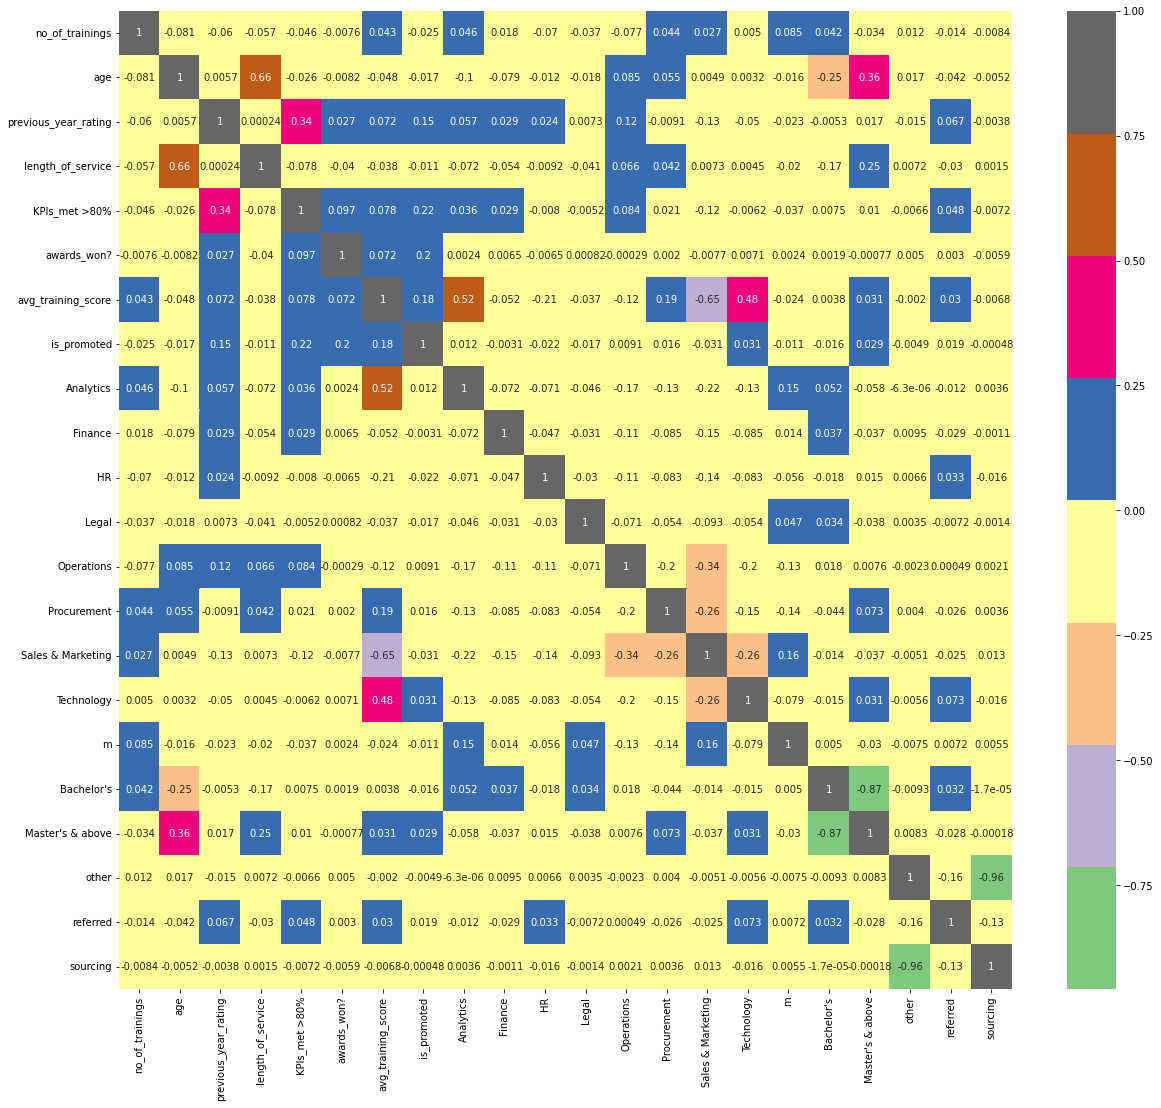

In [ ]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot = True, cmap="Accent")

# **Model Development**

In [ ]:
y_start = df['is_promoted']
x_start =  df.drop(['is_promoted'],axis='columns')

In [ ]:
x_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   no_of_trainings       54808 non-null  int64  
 1   age                   54808 non-null  int64  
 2   previous_year_rating  54808 non-null  float64
 3   length_of_service     54808 non-null  int64  
 4   KPIs_met >80%         54808 non-null  int64  
 5   awards_won?           54808 non-null  int64  
 6   avg_training_score    54808 non-null  int64  
 7   Analytics             54808 non-null  uint8  
 8   Finance               54808 non-null  uint8  
 9   HR                    54808 non-null  uint8  
 10  Legal                 54808 non-null  uint8  
 11  Operations            54808 non-null  uint8  
 12  Procurement           54808 non-null  uint8  
 13  Sales & Marketing     54808 non-null  uint8  
 14  Technology            54808 non-null  uint8  
 15  m                  

# **Model Tuning**

In [ ]:
# rus = RandomUnderSampler(random_state=0)
# x, y = rus.fit_resample(x_start, y_start)

In [ ]:
ros = RandomOverSampler(random_state=0)
x, y = ros.fit_resample(x_start, y_start)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100280 entries, 0 to 100279
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   no_of_trainings       100280 non-null  int64  
 1   age                   100280 non-null  int64  
 2   previous_year_rating  100280 non-null  float64
 3   length_of_service     100280 non-null  int64  
 4   KPIs_met >80%         100280 non-null  int64  
 5   awards_won?           100280 non-null  int64  
 6   avg_training_score    100280 non-null  int64  
 7   Analytics             100280 non-null  uint8  
 8   Finance               100280 non-null  uint8  
 9   HR                    100280 non-null  uint8  
 10  Legal                 100280 non-null  uint8  
 11  Operations            100280 non-null  uint8  
 12  Procurement           100280 non-null  uint8  
 13  Sales & Marketing     100280 non-null  uint8  
 14  Technology            100280 non-null  uint8  
 15  

In [ ]:
# scaler = preprocessing.StandardScaler().fit(x)
# scaler

In [ ]:
# # x = scaler.transform(x)
# x

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

# **Model Selection and Finalization**

In [ ]:
classifier1 = LogisticRegression()
classifier1.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predicted_y = classifier1.predict(x_test)
predicted_y

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
confusion_matrix(y_test,predicted_y)

array([[12038,  4484],
       [ 3671, 12900]])

In [ ]:
precision_score(y_test,predicted_y)

0.7420616658996778

In [ ]:
f1_score(y_test,predicted_y)

0.7598291856869387

In [ ]:
recall_score(y_test,predicted_y)

0.7784684086657414

In [ ]:
gbr = GradientBoostingClassifier(n_estimators = 100)
  
# Fit to training set
gbr.fit(x_train, y_train)
  
# Predict on test set
predicted_y = gbr.predict(x_test)

In [ ]:
confusion_matrix(y_test,predicted_y)

array([[11378,  5144],
       [  841, 15730]])

In [ ]:
precision_score(y_test,predicted_y)

0.7535690332471017

In [ ]:
recall_score(y_test,predicted_y)

0.9492486874660552

In [ ]:
f1_score(y_test,predicted_y)

0.840165576178395

# **Final Model -> Random Forest**

In [ ]:
classifier= RandomForestClassifier(n_estimators= 50, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [ ]:
predicted_y = classifier.predict(x_test)
predicted_y

array([1, 1, 1, ..., 0, 0, 1])

# **Model Performance / Accuracy**

In [ ]:
confusion_matrix(y_test,predicted_y)

array([[15670,   852],
       [    8, 16563]])

In [ ]:
precision_score(y_test,predicted_y)

0.9510766580534022

In [ ]:
recall_score(y_test,predicted_y)

0.9995172288938508

# **Final result that matters** **(F1 score)**

In [ ]:
f1_score(y_test,predicted_y)

0.9746954628376391

# **Making submission file for a test dataset ->**

In [ ]:
# dummies = pd.get_dummies(df1.department)
# df1 = pd.concat([df1,dummies],axis = 'columns')
# df1 = df1.drop(['department','R&D'], axis='columns')
# dummies = pd.get_dummies(df1.gender)
# df1 = pd.concat([df1,dummies],axis = 'columns')
# df1 = df1.drop(['gender', 'f'], axis='columns')
# dummies = pd.get_dummies(df1.education)
# df1 = pd.concat([df1,dummies],axis = 'columns')
# df1 = df1.drop(['education', 'Below Secondary'], axis='columns')
# dummies = pd.get_dummies(df1.recruitment_channel)
# df1 = pd.concat([df1,dummies],axis = 'columns')
# df1 = df1.drop(['recruitment_channel'], axis='columns')
# df1 = df1.drop(['region'],axis='columns')
# df1 = df1.drop(['employee_id'],axis='columns')

In [ ]:
# df1.info()

In [ ]:
#  df1.isnull().sum()

In [ ]:
# mean_value = df1['previous_year_rating'].mean()
# df1['previous_year_rating'].fillna(value=mean_value, inplace=True)

In [ ]:
# x_test =  df1

In [ ]:
# predicted_y = classifier.predict(x_test)
# predicted_y

In [ ]:
# df1 = pd.read_csv('/content/drive/MyDrive/Project/test_2umaH9m.csv')

In [ ]:
# df2 = pd.DataFrame(predicted_y, columns=['is_promoted'])
# df3 = pd.concat([df1['employee_id'],df2],axis = 'columns')

In [ ]:
# df3.info()

In [ ]:
# df3

In [ ]:
# df3.to_csv('/content/drive/MyDrive/Project/submission.csv',index = False)